In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the data
startup= pd.read_csv("C:/Users/DELL/Downloads/50_Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.info()
# NO NULL VALUES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
number=LabelEncoder()
startup['State']=number.fit_transform(startup['State'])
startup['State'].value_counts()


2    17
0    17
1    16
Name: State, dtype: int64

In [6]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
startup.isna().sum()
#  NO NULL VALUES 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


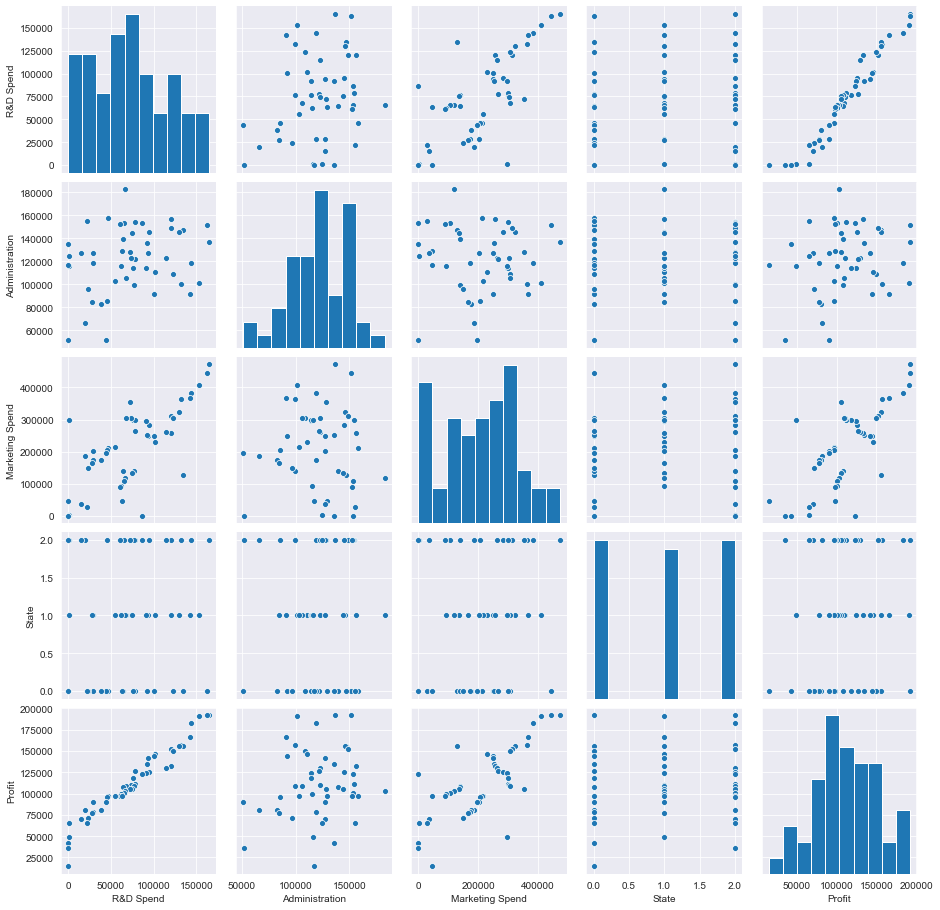

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(startup)


### R&D Spend And Marketing Spend are significant variables
### Between R&D Spend And Marketing Spend there is collinerity


In [13]:
startup_new=startup.rename({'R&D Spend':'RDS','Marketing Spend':'MSP'},axis=1)
startup_new.head()
# Renaming columns

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [16]:
# To Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDS+Administration+MSP+State',data=startup_new).fit()


In [17]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           8.51e-29
Time:                        14:50:58   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RDS                0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
MSP                0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### [P(ADMINISTRATION) and P(STATE)] > 0.05 respectively, so they are insignificant.
### Check significant variables among RDS and MSP as they are corelated


# Simple Linear Regression Models

In [18]:
model_1=smf.ols('Profit~RDS',data = startup_new).fit()  
model_1.summary()

# BUILD MODEL CONSIDERING "RDS" ALONE


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           3.50e-32
Time:                        14:55:38   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RDS            0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model_2=smf.ols('Profit~MSP',data = startup_new).fit()  
model_2.summary()

# BUILD MODEL CONSIDERING "MSP" ALONE

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           4.38e-10
Time:                        14:56:03   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MSP            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_3=smf.ols('Profit~MSP+RDS',data = startup_new).fit()
model_3.summary() 

# BUILD MODEL CONSIDERING "RDS & MSP" TOGETHER

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           2.16e-31
Time:                        14:56:32   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
MSP            0.0299      0.016      1.927      0.060      -0.001       0.061
RDS            0.7966      0.041     19.266      0.000       0.713       0.880
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### By taking RDS and MSP we get improved r squared value and adjacent r squared value so build model using this two

# Calculating VIF

In [22]:
rsq_MSP = smf.ols('MSP~RDS+Administration+State',data=startup_new).fit().rsquared  
vif_MSP = 1/(1-rsq_MSP)

rsq_RDS = smf.ols('RDS~MSP+Administration+State',data=startup_new).fit().rsquared  
vif_RDS= 1/(1-rsq_RDS)


# Storing vif values in a data frame
d1 = {'Variables':['MSP','RDS'],'VIF':[vif_MSP,vif_RDS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,MSP,2.326780
1,RDS,2.481178


SINCE VIF VALUES NOT GREATER THAN 10 BOTH ARE NOT INVOLVED IN COLLINEARITY

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

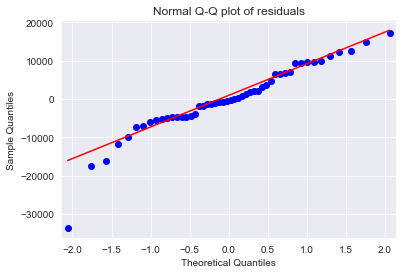

In [23]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_3.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [24]:
list(np.where(model_3.resid>10))

[array([ 1,  2,  3, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36, 37,
        38, 40, 41, 42, 43, 45], dtype=int64)]

## Residual Plot for Homoscedasticity

In [25]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

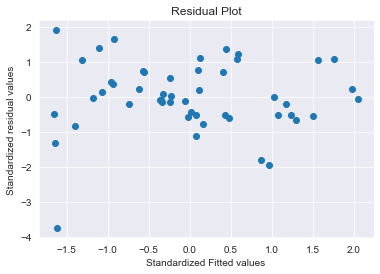

In [26]:
plt.scatter(get_standardized_values(model_3.fittedvalues),
            get_standardized_values(model_3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### We can see that since errors has constant variance they are homosckedastic 


## Residual Vs Regressors

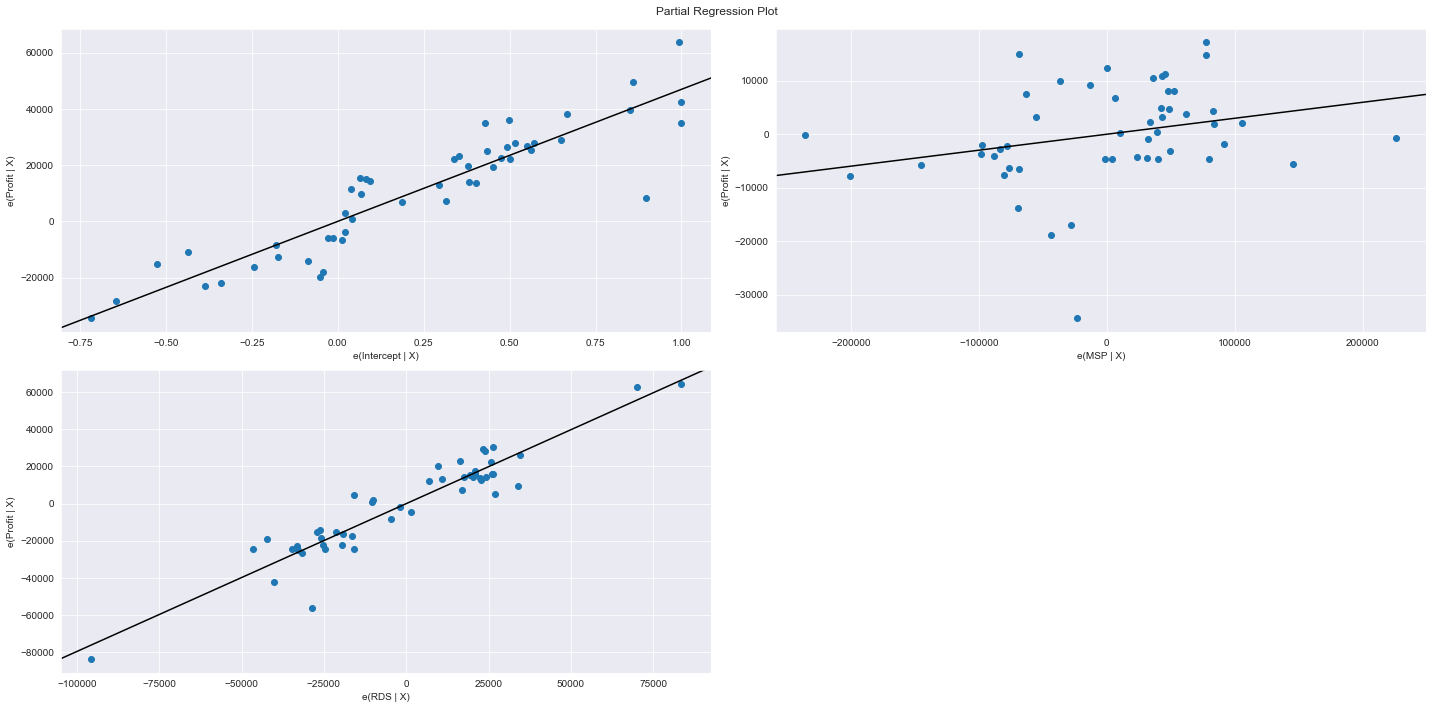

In [27]:
fig = plt.figure(figsize=(20,10))
fig = sm.graphics.plot_partregress_grid(model_3,fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [28]:
model_3_influence = model_3.get_influence()
(c, _) = model_3_influence.cooks_distance

<ipython-input-29-59f42b0d6191>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_new)), np.round(c, 3))


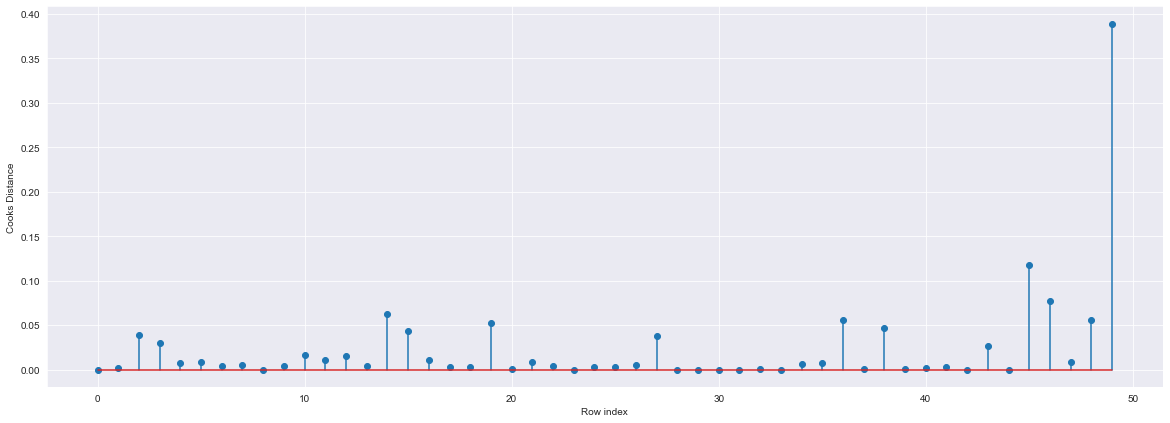

In [29]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [30]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3894886227924914)

## High Influence points

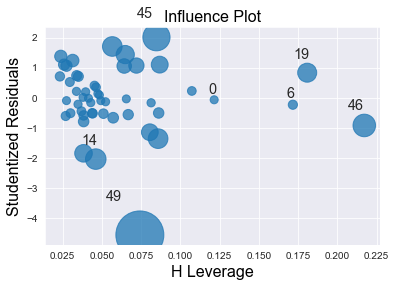

In [31]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_3)
plt.show()

In [32]:
k = startup_new.shape[1]
n = startup_new.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [33]:
startup_new[startup_new.index.isin([49])]

,RDS,Administration,MSP,State,Profit
49,0.0,116983.8,45173.06,0,14681.4


In [34]:
#See the differences in HP and other variable values
startup_new.head()

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Improving the model

In [35]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup_new_1=startup_new.drop(startup_new.index[[49]],axis=0).reset_index()

In [36]:
#Drop the original index
startup_new_1=startup_new_1.drop(['index'],axis=1)

In [37]:
startup_new_1.head()

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


# Build Model

In [39]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_model= smf.ols('Profit~MSP+RDS',data = startup_new_1).fit()

In [40]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           3.74e-33
Time:                        15:06:12   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
MSP            0.0274      0.013      2.104      0.041       0.001       0.054
RDS            0.7754      0.035     22.136      0.000       0.705       0.846
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
final_model_influence = final_model.get_influence()
(c, _) = final_model_influence.cooks_distance

<ipython-input-42-4afdeafae68c>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_new_1)), np.round(c, 3))


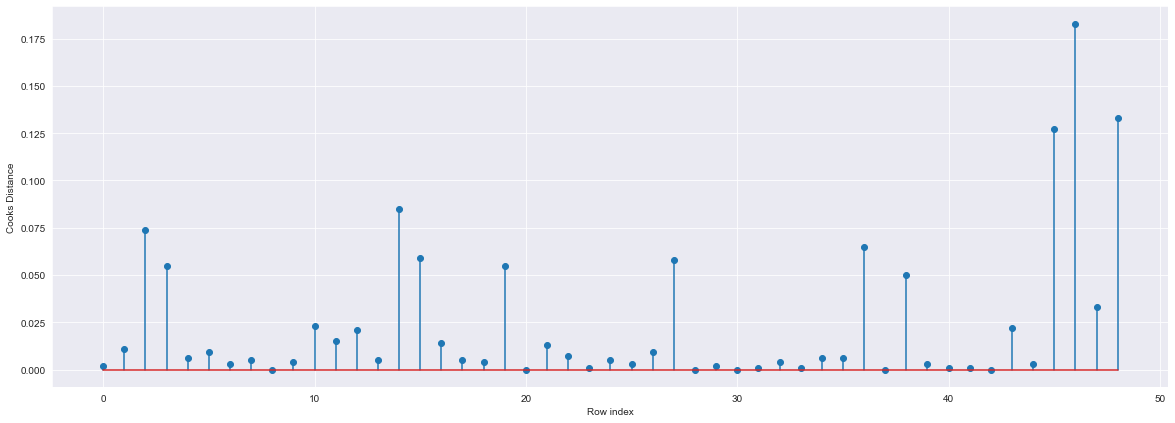

In [42]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
(np.argmax(c),np.max(c))

(46, 0.18337556491338422)

In [44]:
startup_new_2=startup_new_1.drop(startup_new_1.index[[46]],axis=0).reset_index()
startup_new_2=startup_new_2.drop(['index'],axis=1)
startup_new_2.head()

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [45]:
final_model1= smf.ols('Profit~MSP+RDS',data = startup_new_2).fit()
final_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     544.5
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           2.94e-32
Time:                        15:07:19   Log-Likelihood:                -495.55
No. Observations:                  48   AIC:                             997.1
Df Residuals:                      45   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.017e+04   2333.087     21.505      0.000    4.55e+04    5.49e+04
MSP            0.0353      0.014      2.511      0.016       0.007       0.064
RDS            0.7512      0.039     19.431      0.000       0.673       0.829
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.313
Skew:                          -0.091   Prob(JB):                        0.855
Kurtosis:                       2.649   Cond. No.                     5.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-46-829474944682>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_new_2)), np.round(c, 3))


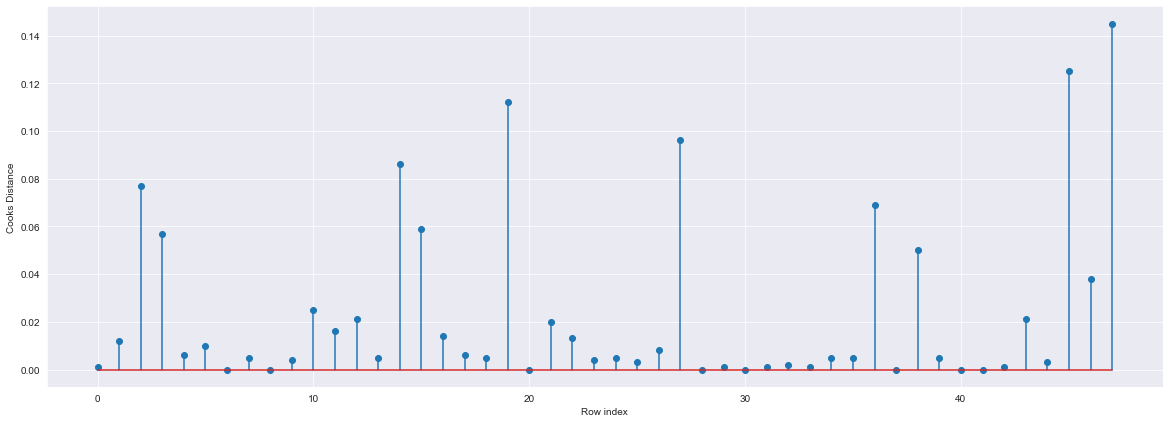

In [46]:
final_model1_influence = final_model1.get_influence()
(c, _) = final_model1_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new_2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [47]:
(np.argmax(c),np.max(c))

(47, 0.14544403432423866)

In [48]:
startup_new_3=startup_new_2.drop(startup_new_2.index[[47]],axis=0).reset_index()
startup_new_3=startup_new_3.drop(['index'],axis=1)
startup_new_3.head()

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [49]:
final_model2= smf.ols('Profit~MSP+RDS',data = startup_new_3).fit()
final_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           1.65e-31
Time:                        15:08:29   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
MSP            0.0323      0.014      2.376      0.022       0.005       0.060
RDS            0.7439      0.037     19.902      0.000       0.669       0.819
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-50-d0dd1682b6fd>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_new_3)), np.round(c, 3))


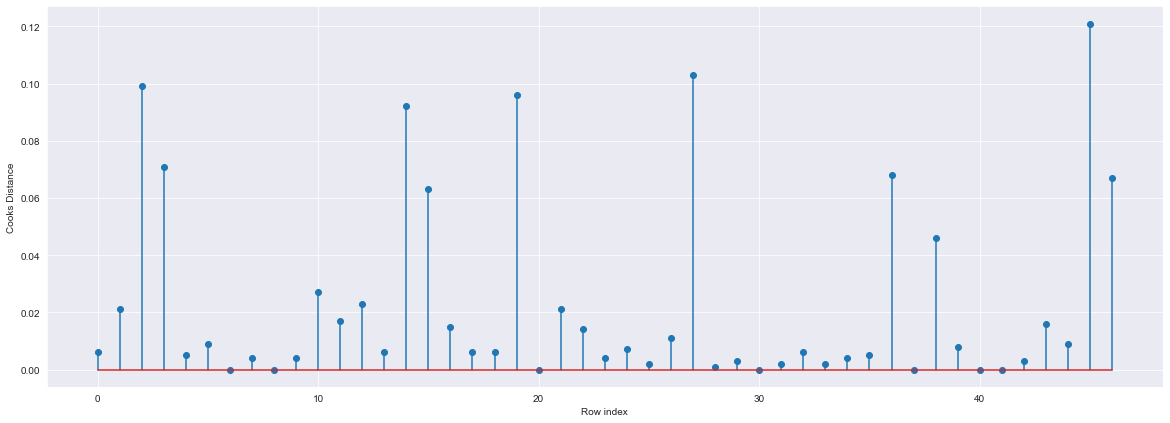

In [50]:
final_model2_influence = final_model2.get_influence()
(c, _) = final_model2_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new_3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [51]:
(np.argmax(c),np.max(c))

(45, 0.12080904032647989)

In [52]:
startup_new_4=startup_new_3.drop(startup_new_3.index[[45]],axis=0).reset_index()
startup_new_4=startup_new_4.drop(['index'],axis=1)
startup_new_4.head()

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [53]:
final_model3= smf.ols('Profit~MSP+RDS',data = startup_new_4).fit()
final_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     532.5
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           4.59e-31
Time:                        15:09:34   Log-Likelihood:                -471.88
No. Observations:                  46   AIC:                             949.8
Df Residuals:                      43   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.029e+04   2424.629     20.743      0.000    4.54e+04    5.52e+04
MSP            0.0350      0.013      2.627      0.012       0.008       0.062
RDS            0.7507      0.037     20.511      0.000       0.677       0.825
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.161
Skew:                          -0.079   Prob(JB):                        0.923
Kurtosis:                       2.758   Cond. No.                     6.08e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-54-65d3dc453332>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_new_4)), np.round(c, 3))


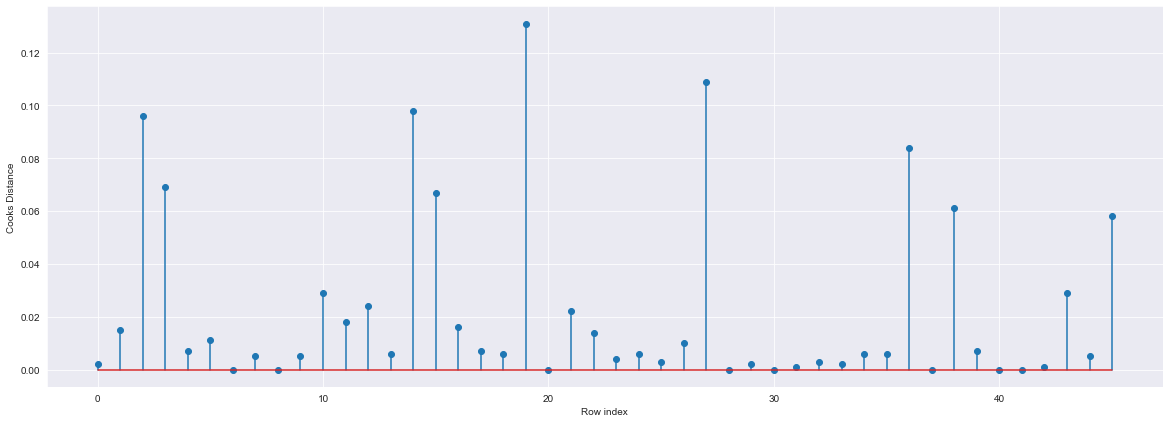

In [54]:
final_model3_influence = final_model3.get_influence()
(c, _) = final_model3_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new_4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
(np.argmax(c),np.max(c))

(19, 0.13115264468345858)

In [56]:
startup_new_5=startup_new_4.drop(startup_new_4.index[[19]],axis=0).reset_index()
startup_new_5=startup_new_5.drop(['index'],axis=1)
startup_new_5.head()

,RDS,Administration,MSP,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [57]:
final_model4= smf.ols('Profit~MSP+RDS',data = startup_new_5).fit()
final_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     538.7
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           1.15e-30
Time:                        15:10:24   Log-Likelihood:                -461.34
No. Observations:                  45   AIC:                             928.7
Df Residuals:                      42   BIC:                             934.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.965e+04   2469.792     20.103      0.000    4.47e+04    5.46e+04
MSP            0.0429      0.015      2.903      0.006       0.013       0.073
RDS            0.7342      0.039     18.880      0.000       0.656       0.813
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.138
Skew:                          -0.073   Prob(JB):                        0.933
Kurtosis:                       2.771   Cond. No.                     6.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-58-19d6768ea367>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_new_5)), np.round(c, 3))


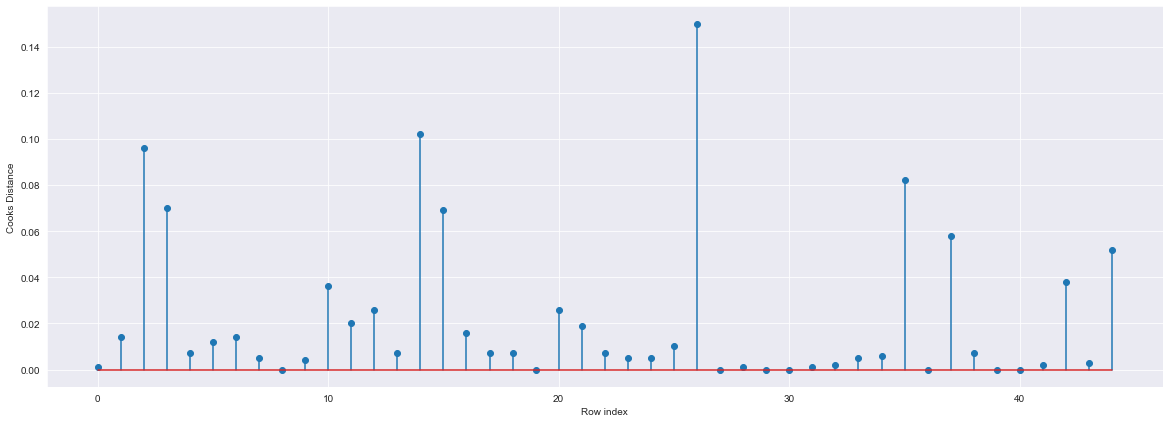

In [58]:
final_model4_influence = final_model4.get_influence()
(c, _) = final_model4_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new_5)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [59]:
(np.argmax(c),np.max(c))

(26, 0.14998982219852292)

In [62]:
startup_new_6=startup_new_5.drop(startup_new_5.index[[26]],axis=0).reset_index()
startup_new_6=startup_new_6.drop(['index'],axis=1)


In [63]:
final_model5= smf.ols('Profit~MSP+RDS',data = startup_new_6).fit()
final_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     575.6
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           9.92e-31
Time:                        15:12:31   Log-Likelihood:                -449.60
No. Observations:                  44   AIC:                             905.2
Df Residuals:                      41   BIC:                             910.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.95e+04   2390.810     20.703      0.000    4.47e+04    5.43e+04
MSP            0.0517      0.015      3.452      0.001       0.021       0.082
RDS            0.7151      0.039     18.401      0.000       0.637       0.794
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.118
Skew:                          -0.061   Prob(JB):                        0.943
Kurtosis:                       2.777   Cond. No.                     6.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<ipython-input-64-36dc68068b9c>:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(startup_new_6)), np.round(c, 3))


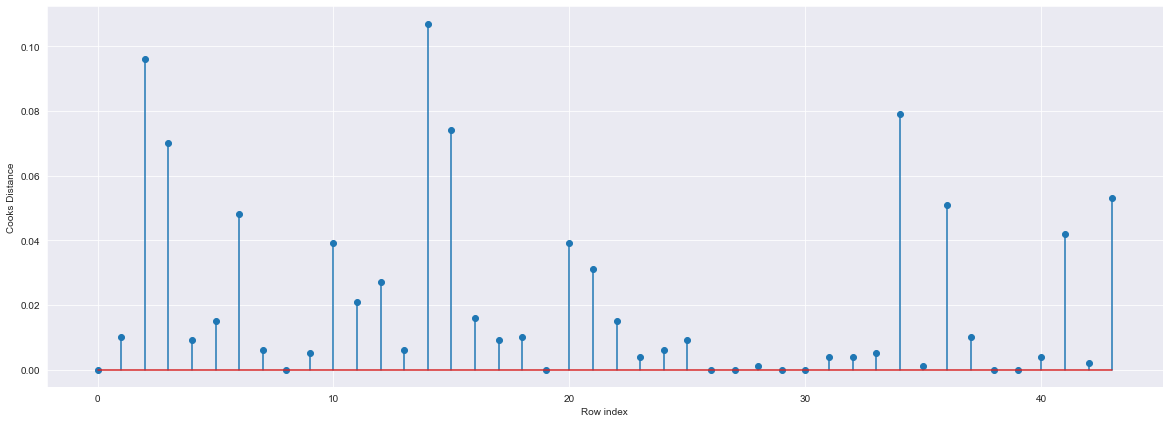

In [64]:
final_model5_influence = final_model5.get_influence()
(c, _) = final_model5_influence.cooks_distance

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new_6)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [65]:
(np.argmax(c),np.max(c))

(14, 0.10730803791817874)

In [66]:
startup_new_7=startup_new_6.drop(startup_new_6.index[[26]],axis=0).reset_index()
startup_new_7=startup_new_7.drop(['index'],axis=1)


In [67]:
final_model6= smf.ols('Profit~MSP+RDS',data = startup_new_7).fit()
final_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     559.2
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           5.80e-30
Time:                        15:15:21   Log-Likelihood:                -439.88
No. Observations:                  43   AIC:                             885.8
Df Residuals:                      40   BIC:                             891.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.947e+04   2457.565     20.129      0.000    4.45e+04    5.44e+04
MSP            0.0519      0.015      3.371      0.002       0.021       0.083
RDS            0.7148      0.040     18.073      0.000       0.635       0.795
==============================================================================
Omnibus:                        0.031   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.170
Skew:                          -0.056   Prob(JB):                        0.918
Kurtosis:                       2.713   Cond. No.                     6.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We get improved r squared value as 0.965

## Training and Testing 

In [83]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(startup_new_7,test_size=0.17)
train_data.head()


,RDS,Administration,MSP,State,Profit
18,91749.16,114175.79,294919.57,1,124266.90
36,38558.51,82982.09,174999.30,0,81005.76
23,77044.01,99281.34,140574.81,2,108552.04
4,142107.34,91391.77,366168.42,1,166187.94
8,120542.52,148718.95,311613.29,2,152211.77


In [84]:
test_data.head()

,RDS,Administration,MSP,State,Profit
5,131876.90,99814.71,362861.36,2,156991.12
3,144372.41,118671.85,383199.62,2,182901.99
24,64664.71,139553.16,137962.62,0,107404.34
19,76253.86,113867.30,298664.47,0,118474.03
42,0.00,135426.92,0.00,0,42559.73


In [85]:
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2)/startup_new_7.shape[0])


In [86]:
train_model=smf.ols('Profit~MSP+RDS',data = train_data).fit()
predtrain=train_model.predict(train_data)
actualtrain=train_data.Profit
errors=predtrain-actualtrain
rmse_train=RMSE(predtrain,actualtrain)
rmse_train

1054.9851463373302

In [87]:
predtest=train_model.predict(test_data)
actualtest=test_data.Profit
errors=predtest-actualtest
rmse_test=RMSE(predtest,actualtest)
rmse_test

916.7291461394325

### Training RMSE and Testing RMSE is approx equal thus it is good model.
